In [1]:
import plot_map
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def net_visualization(data, bounds, savefig=False):
    '''data包含三列，即车辆id，经度， 纬度，传入前需对整条记录去重经度统一命名为Lng， 纬度统一命名为Lat，
       bounds为[经度起点，纬度起点，经度终点，纬度终点]的列表， 用于筛选经纬度范围'''
    
    data = data.query('Lng > @bounds[0] & Lng < @bounds[2] & Lat > @bounds[1] & Lat < @bounds[3]').copy() #  筛选经纬度范围
    
    # 经纬度小数点保留三位小数， 集计每个小范围内的数据量， 
    data2 = data.groupby([data['Lng'].round(3), data['Lat'].round(3)]).size().reset_index()
    data2.rename(columns={0: 'count'}, inplace=True)
    
    d = data2.pivot_table(index='Lat', columns='Lng', values='count', fill_value=0)

    x = d.columns # 横坐标为经度
    y = d.index # 纵坐标为纬度
    z = np.log(d.values+1e-5) # 颜色为gps点数量取对数
    
    fig = plt.figure(figsize=(20, 20), dpi=60)
    ax = plt.subplot(111)

    plot_map.plot_map(plt, bounds, zoom=14, style=4) # 绘制底图

    # 绘制热力线网
    levels = np.linspace(0, z.max(), 25)
    cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', ['#9DCC42','#FFFE03','#F7941D','#E9420E','#FF0000'], 256)
    plt.contourf(x, y, z, levels=levels, cmap=cmap, origin='lower')
    
    # 细节调整
    plt.axis('off')
    plt.xlim(bounds[0], bounds[2])
    plt.ylim(bounds[1], bounds[3])

    # 绘制colorbar
    plt.imshow([np.exp(levels)], cmap=cmap)
    cax = plt.axes([0.16, 0.32, 0.02, 0.3])
    plt.colorbar(cax=cax)
    
    if savefig:
        plt.savefig(savefig, dpi=120)

    plt.show()

In [3]:
path = r"D:\edge_download\公交gps"
data = pd.read_csv(path, header=None, names=['VehicleNum', 'Stime', 'Lng', 'Lat', 'OpenStatus', 'Speed'])

bounds = [113.7, 22.42, 114.3, 22.8]

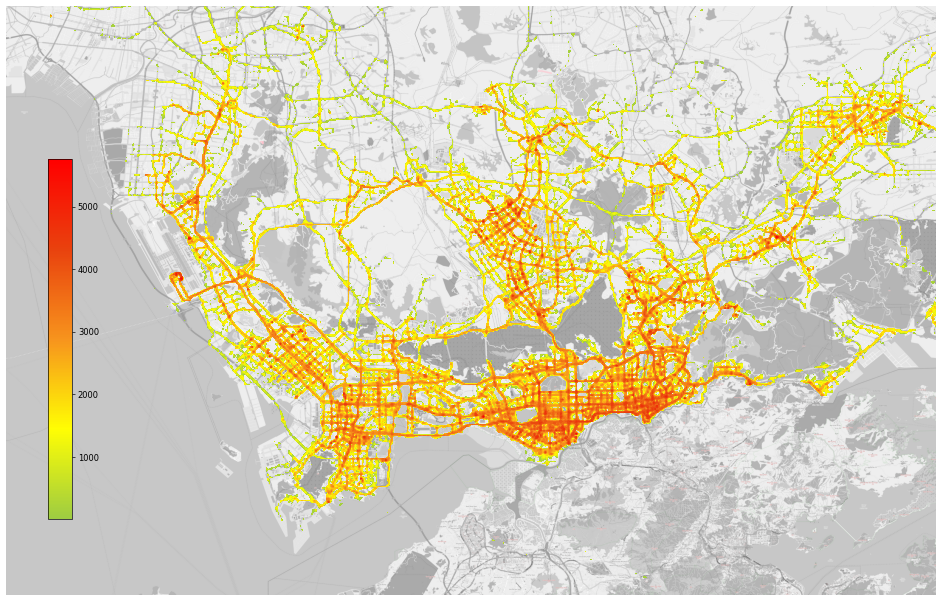

In [4]:
net_visualization(data, bounds)